# Creation of General NN
This part is necesary but redundant as it is in the src script. The important cells are the ones of individual regressions.

Limpieza de los datos eliminando cualquier fila que contenga valores nulos y restablece el índice. A continuación, convierte las columnas 'STD' y 'STA' a formato de fecha y hora.

Una vez que las columnas de fecha y hora están en el formato correcto, el código extrae características de estas columnas, como la hora y el día de la semana.

Luego, el código define las columnas que se utilizarán como características (X) y las que se utilizarán como etiquetas (y) para el modelado de machine learning. Las características incluyen información sobre la estación de salida, la estación de llegada, el tipo de destino, el tipo de origen, la capacidad, los pasajeros, las reservas, y las características extraídas de las columnas de fecha y hora. Las etiquetas son todas las demás columnas, que parecen ser diferentes tipos de productos.

Finalmente, el código asigna las columnas de características y etiquetas a las variables X e y, respectivamente.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
import category_encoders as ce
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
flights_with_products = pd.read_parquet("C:/Users/oabanderas/Downloads/flights_with_products.parquet")
# flights_with_products.head()

flights_data = flights_with_products.dropna()
flights_data = flights_data.reset_index(drop=True)


# Convertir las columnas de fecha y hora
flights_data['STD'] = pd.to_datetime(flights_data['STD'])
flights_data['STA'] = pd.to_datetime(flights_data['STA'])

# Extraer características de fecha y hora
flights_data['STD_hour'] = flights_data['STD'].dt.hour
flights_data['STA_hour'] = flights_data['STA'].dt.hour
flights_data['STD_day_of_week'] = flights_data['STD'].dt.dayofweek
flights_data['STA_day_of_week'] = flights_data['STA'].dt.dayofweek

x_columns = ['DepartureStation', 'ArrivalStation', 'Destination_Type', 'Origin_Type', 'Capacity', 'Passengers', 'Bookings', 'STD_hour', 'STA_hour', 'STD_day_of_week', 'STA_day_of_week']
y_columns = [col for col in flights_data.columns if col not in x_columns + ['Flight_ID'] + ['STD'] + ['STA'] + ["Aeronave"]]

X = flights_data[x_columns]
y = flights_data[y_columns]

y = y[['Agua Natural 600 Ml',
 'Amstel Ultra',
 'Arandano',
 'Arandano Mango Mix',
 'Arcoiris',
 'Baileys',
 'Baileys ',
 'Botana Sabritas Con Dip De Queso',
 'Cafe 19 Cafe Clasico',
 'Cafe 19 Capuchino',
 'Cafe 19 Chiapas',
 'Cafe Costa',
 'Cafe De Olla',
 'Capitan Morning',
 'Capitan Morning Con Pan Dulce',
 'Carne Seca Habanero',
 'Carne Seca Original',
 'Cerveza Charter',
 'Charter Cheve Doble',
 'Charter Licor Doble',
 'Cheetos',
 'Cheetos Flamin Hot',
 'Chokis',
 'Ciel Mineralizada',
 'Club Sandwich',
 'Coca Cola Dieta',
 'Coca Cola Regular',
 'Coca Sin Azucar',
 'Corajillo',
 'Corajillo Baileys ',
 'Cuerno Clasico De Pavo',
 'Cuerno Individual Charter',
 'Dip De Queso',
 'Doritos Nacho',
 'Emperador Chocolate',
 'Emperador Vainilla',
 'Fanta De Naranja',
 'Fritos Limon Y Sal',
 'Frutos Secos Enchilados',
 'Galleta De Arandano Relleno De Q/Crema',
 'Galleta De Chispas De Chocolate',
 'Galleta De Chocolate',
 'Go Nuts',
 'Gomita Enchilada La Cueva',
 'Heineken 0',
 'Heineken Original',
 'Heineken Silver',
 'Jack And Coke',
 'Jugo De Mango',
 'Jugo De Manzana',
 'Jw Red Label',
 'Jw Red Label ',
 'Kacang Flaming Hot',
 'Leche De Chocolate Sc',
 'Leche De Fresa Sc',
 'Licor + Refresco',
 'Licor Charter',
 'Luxury Nut Mix',
 'Mafer Sin Sal',
 'Mega Cuerno Clasico',
 'Mega Cuerno Tripulacion',
 'Muffin Integral',
 'Nishikawa Japones',
 'Nishikawa Salado',
 'Nissin Dark Dragon',
 'Nissin Fuego',
 'Nissin Limon Y Habanero',
 'Nissin Picante',
 'Nissin Res',
 'Nueces De Arbol Mix',
 'Nutty Berry Mix',
 'Panini Clasico',
 'Panini Integral',
 'Protein Adventure',
 'Quaker Avena Frutos Rojos',
 'Quaker Avena Moras',
 'Quaker Granola',
 'Quaker Natural Balance',
 'Rancheritos',
 'Ron Bacardi',
 'Ruffles Queso',
 'Sabritas Flamin Hot',
 'Sabritas Originales',
 'Salsa Botanera',
 'Sidral Mundet',
 'Sol Clamato',
 'Sprite',
 'Te Frutos Rojos',
 'Te Manzanilla Jengibre',
 'Te Relax',
 'Te Vainilla',
 'Tecate Light',
 'Tequila + Mezclador',
 'Tequila 7 Leguas Blanco',
 'Tequila 7 Leguas Reposado',
 'Tinto',
 'Topochico Seltzer Fresa-Guayaba',
 'Topochico Seltzer Mango',
 'Tostitos',
 'Tostitos Nachos Con Dip',
 'Ultra Seltzer Frambuesa',
 'Vino Blanco Cria Cuervos ',
 'Vino Tinto Cria Cuervos',
 'Vino Tinto Sangre De Toro',
 'Xx Lager',
 'Xx Ultra']]

Definir las características categóricas y numéricas en los datos. Las características categóricas son 'DepartureStation', 'ArrivalStation', 'Destination_Type', 'Origin_Type' y las características numéricas son 'Capacity', 'Passengers', 'Bookings', 'STD_hour', 'STA_hour', 'STD_day_of_week', 'STA_day_of_week'.

Crea un preprocesador que transforma las características numéricas y categóricas. Las características numéricas se estandarizan (se les resta la media y se dividen por la desviación estándar) y las características categóricas se codifican en un formato one-hot.

Luego, aplica el preprocesador a los datos de entrada X y convierte las etiquetas y en un array.

Después, divide los datos en conjuntos de entrenamiento y prueba. El 80% de los datos se utilizan para el entrenamiento y el 20% para la prueba.

A continuación, define un modelo de red neuronal con tres capas. La primera capa tiene 128 neuronas y utiliza la función de activación ReLU. La segunda capa es una capa de dropout que desactiva aleatoriamente el 50% de las neuronas durante el entrenamiento para prevenir el sobreajuste. La tercera capa tiene 64 neuronas y también utiliza la función de activación ReLU. La última capa tiene un número de neuronas igual al número de productos y utiliza la función de activación ReLU.

Luego, compila el modelo utilizando el optimizador Adam y la pérdida de error cuadrático medio.

Finalmente, aunque está comentado, el código muestra cómo se entrenaría el modelo utilizando los datos de entrenamiento. El modelo se entrenaría durante 100 épocas con un tamaño de lote de 32.

In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense

# Asumimos que X e y ya están definidos como DataFrames.

# Preprocesamiento
categorical_features = ['DepartureStation', 'ArrivalStation', 'Destination_Type', 'Origin_Type']
numeric_features = ['Capacity', 'Passengers', 'Bookings', 'STD_hour', 'STA_hour', 'STD_day_of_week', 'STA_day_of_week']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Preparar datos
X_transformed = preprocessor.fit_transform(X)
y_array = y.values

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_array, test_size=0.2, random_state=0)

# Definición del modelo de red neuronal
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(y.shape[1], activation="relu")  # Número de neuronas , de salida igual al número de productos
])

model.compile(optimizer="Adam", loss='mse')

# Entrenamiento
# model.fit(X_train, y_train, epochs=100, batch_size=32)



c:\Users\elian.rodriguez\AppData\Local\anaconda3\envs\datathon\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2122/2122 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1.4796 - val_loss: 1.0888
Epoch 2/100
2122/2122 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.1116 - val_loss: 1.0659
Epoch 3/100
2122/2122 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.0934 - val_loss: 1.0466
Epoch 4/100
2122/2122 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.0866 - val_loss: 1.0400
Epoch 5/100
2122/2122 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.0703 - val_loss: 1.0507
Epoch 6/100
2122/2122 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.0594 - val_loss: 1.0324
Epoch 7/100
2122/2122 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.0666 - val_loss: 1.0368
Epoch 8/100
2122/2122 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.0558 - val_loss: 1.0305
Epoch 9/100
2122/2122 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.0625 - val_loss: 1.0340
Epoch 10/100
2122/2122 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.0616 - val_loss: 1.0338
Epoch 11/100
2122/2122 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.0817 - val_loss: 1.0283
Epoch 12/100
2122/2

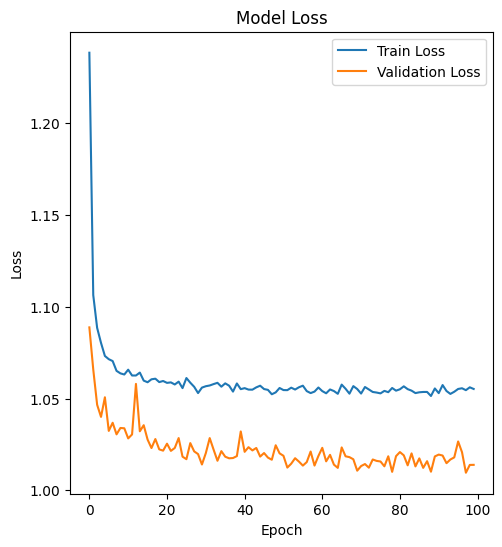

In [55]:
# Entrenamiento
import matplotlib.pyplot as plt

# Entrenamiento con validación
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Función para graficar la pérdida
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

# Llama a la función para graficar la pérdida
plot_training_history(history)

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Realiza las predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcula las métricas de error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Mean Squared Error: 0.9834994490392536
Mean Absolute Error: 0.42325203429477454
R^2 Score: 0.10466459643351854


La función predict_new toma como entrada una lista de datos que representan un nuevo vuelo. Esta lista se convierte en un DataFrame de pandas que tiene las mismas columnas que el DataFrame X original. Luego, se aplica el preprocesador a estos datos para transformarlos de la misma manera que se transformaron los datos de entrenamiento. Finalmente, se utiliza el modelo para predecir la salida para estos datos transformados.

Después de definir la función, la celda muestra un ejemplo de cómo usarla. Crea una lista new_flight que representa un nuevo vuelo con ciertos valores para cada característica. Luego, llama a la función predict_new con esta lista y muestra la predicción resultante.

In [57]:
# Función de predicción
def predict_new(data):
    data_df = pd.DataFrame([data], columns=X.columns)
    data_transformed = preprocessor.transform(data_df)
    prediction = model.predict(data_transformed)
    return prediction

# Ejemplo de uso de la función de predicción
new_flight = ['AT', 'AZ', 'Ciudad Fronteriza', 'Ciudad Principal', 240, 230, 150, 10, 13, 3, 3]
print(predict_new(new_flight))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[5.762098   0.79480827 0.         0.         0.5799176  0.
  0.         0.         0.         0.685329   0.8507599  0.27383932
  0.         0.5089898  0.046535   0.         0.         0.
  0.         0.         1.7445557  0.39275262 0.7981691  0.9386364
  0.         1.3641447  8.45014    1.5607976  0.1494107  0.17478263
  0.67512715 0.         0.18285705 2.6679435  0.14389199 0.25200307
  0.909845   2.0739715  0.         0.         0.         0.
  0.2040945  0.         0.         0.9370417  0.19448243 0.14817783
  0.7771077  0.8807572  0.         0.         0.         0.2862721
  0.25047827 0.35186297 0.         0.         0.42761403 1.499234
  0.         0.         0.4571775  0.2182847  0.1497359  0.51059616
  0.         0.99162364 0.5301155  0.         0.16754799 2.4302557
  1.509573   0.         0.12552124 0.         0.10371863 0.
  0.6122114  0.         2.7277987  1.6404631  4.441164   0.
  1.2812924  0.21669373 1.5367045  0.0852305  0.       

# Create a regression for every product to predict

The code that was made previously is to be able to predict all the products of a flight with a single model, in this case neural networks were used. But, more data is needed to be able to train a neural network well, so a viable solution, but one that takes more time, is to apply a random forest model for each product, so there will be one model per product and in the end it will be You can put the results together. We did not make all the products since it takes longer but it is a solution that gives better performance.

In [6]:
y.head()

,Agua Natural 600 Ml,Amstel Ultra,Arandano,Arandano Mango Mix,Arcoiris,Baileys,Baileys,Botana Sabritas Con Dip De Queso,Cafe 19 Cafe Clasico,Cafe 19 Capuchino,...,Topochico Seltzer Fresa-Guayaba,Topochico Seltzer Mango,Tostitos,Tostitos Nachos Con Dip,Ultra Seltzer Frambuesa,Vino Blanco Cria Cuervos,Vino Tinto Cria Cuervos,Vino Tinto Sangre De Toro,Xx Lager,Xx Ultra
0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0
1,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
y2 = y["Agua Natural 600 Ml"]

X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=42)

# Create the encoder by specifying the categorical columns
encoder = ce.TargetEncoder(cols=['DepartureStation', 'ArrivalStation', 'Destination_Type', 'Origin_Type'])

# Tune the encoder with training data
encoder.fit(X_train, y_train)

# Transform the data
X_train_encoded = encoder.transform(X_train)
X_test_encoded = encoder.transform(X_test)

n_estimators = 300 
max_depth = 30     
min_samples_split = 5

rf_model  = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split = min_samples_split, n_jobs = -1)

rf_model.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_encoded)

# Calculate and display R^2
r2 = r2_score(y_test, y_pred)
print(f"Determination Coefficient (R^2): {r2}")

Determination Coefficient (R^2): 0.4666505882800249


In [9]:
y2 = y.iloc[:,1]

X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=42)

# Create the encoder by specifying the categorical columns
encoder = ce.TargetEncoder(cols=['DepartureStation', 'ArrivalStation', 'Destination_Type', 'Origin_Type'])

# Tune the encoder with training data
encoder.fit(X_train, y_train)

# Transform the data
X_train_encoded = encoder.transform(X_train)
X_test_encoded = encoder.transform(X_test)

n_estimators = 300 
max_depth = 30     
min_samples_split = 5

rf_model  = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split = min_samples_split, n_jobs = -1)

rf_model.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_encoded)

# Calculate and display R^2
r2 = r2_score(y_test, y_pred)
print(f"Determination Coefficient (R^2): {r2}")

Determination Coefficient (R^2): 0.1316132818824619


In [11]:
y2 = y.iloc[:,4]

X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=42)

# Create the encoder by specifying the categorical columns
encoder = ce.TargetEncoder(cols=['DepartureStation', 'ArrivalStation', 'Destination_Type', 'Origin_Type'])

# Tune the encoder with training data
encoder.fit(X_train, y_train)

# Transform the data
X_train_encoded = encoder.transform(X_train)
X_test_encoded = encoder.transform(X_test)

n_estimators = 300 
max_depth = 30     
min_samples_split = 5

rf_model  = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split = min_samples_split, n_jobs = -1)

rf_model.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_encoded)

# Calculate and display R^2
r2 = r2_score(y_test, y_pred)
print(f"Determination Coefficient (R^2): {r2}")

Determination Coefficient (R^2): 0.11458509978209996
